# Finding Heavy Traffic Indicators on I-94

---



# **Summary**

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

After analysis, we will come to conclusion that these are key heavy traffic indicators:

**Time indicators:**
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

**Weather indicators:**
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

---



In [ ]:
import pandas as pd
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(data.head())
print(data.tail())
print(data.info())

  holiday    temp  ...            date_time  traffic_volume
0    None  288.28  ...  2012-10-02 09:00:00            5545
1    None  289.36  ...  2012-10-02 10:00:00            4516
2    None  289.58  ...  2012-10-02 11:00:00            4767
3    None  290.13  ...  2012-10-02 12:00:00            5026
4    None  291.14  ...  2012-10-02 13:00:00            4918

[5 rows x 9 columns]
      holiday    temp  ...            date_time  traffic_volume
48199    None  283.45  ...  2018-09-30 19:00:00            3543
48200    None  282.76  ...  2018-09-30 20:00:00            2781
48201    None  282.73  ...  2018-09-30 21:00:00            2159
48202    None  282.09  ...  2018-09-30 22:00:00            1450
48203    None  282.12  ...  2018-09-30 23:00:00             954

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0  

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

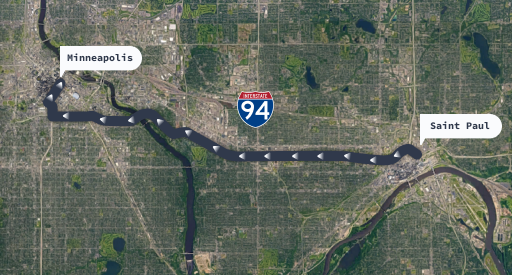

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

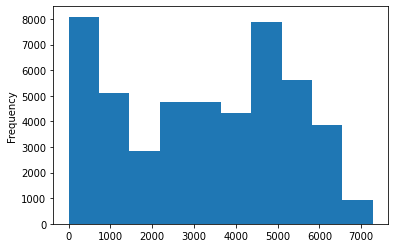

In [ ]:
import matplotlib.pyplot as plt
data['traffic_volume'].plot.hist()
plt.show()

In [ ]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

Isolationg daytime and nighttime data:
* Daytime data: hours from 7 AM to 7 PM (12 hours)
* Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [ ]:
data['date_time']=pd.to_datetime(data['date_time'])
day = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]
print(day.shape)
night=data.copy()[(data['date_time'].dt.hour>=19)  | (data['date_time'].dt.hour<7)]
print(night.shape)

(23877, 9)
(24327, 9)


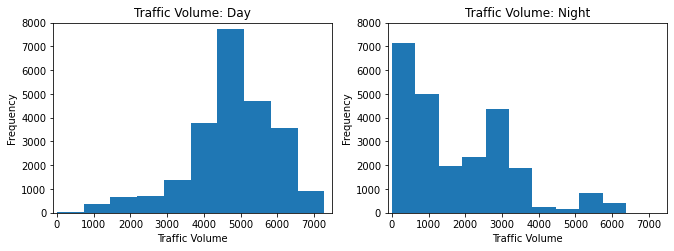

In [ ]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [ ]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

**Time Indicators**

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

**Time Indicators (I)**

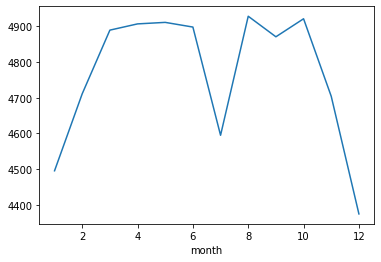

In [ ]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()


The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.



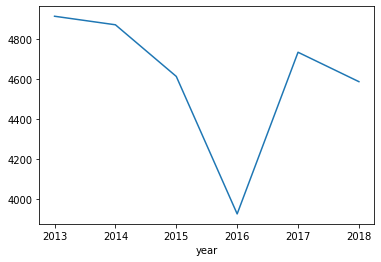

In [ ]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

**Time Indicators (II)**

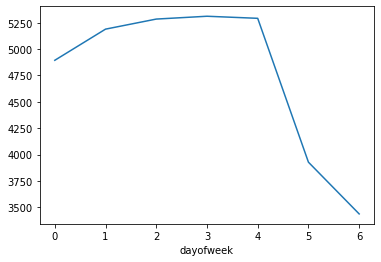

In [ ]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()


Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

**Time Indicators (III)**

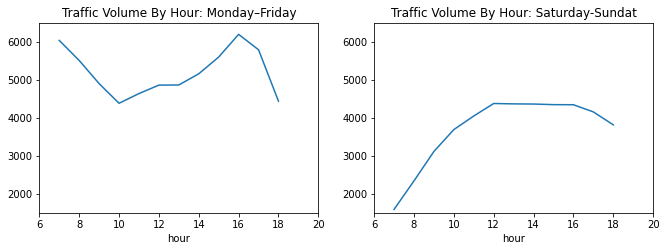

In [ ]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4]  
weekend = day.copy()[day['dayofweek'] >= 5] 
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Saturday-Sundat')

plt.show()

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

**Weather Indicators**

In [ ]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
week             -0.020141
dayofweek        -0.416453
businessday       0.317202
hour              0.172704
Name: traffic_volume, dtype: float64

(230.0, 320.0)

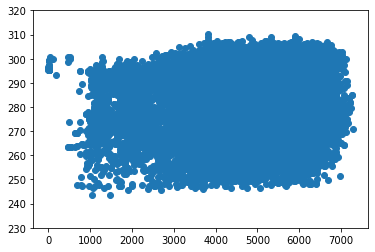

In [ ]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.ylim(230,320)

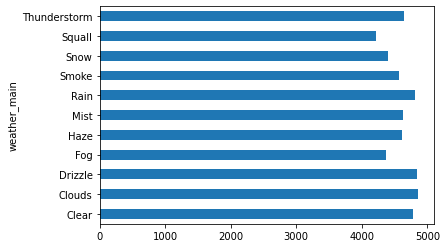

In [ ]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

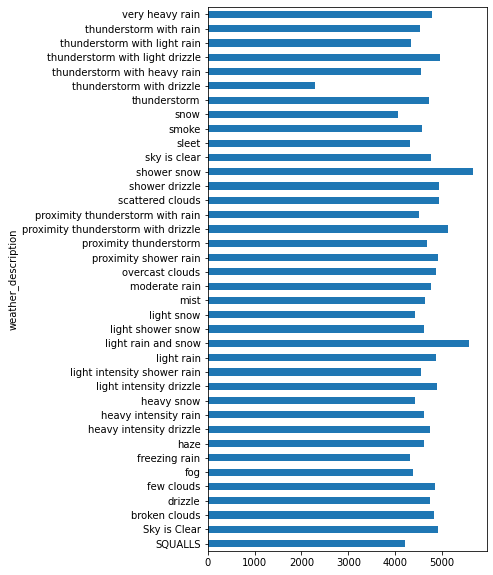

In [ ]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle


It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

**Conclusion**

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators:
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.


Weather indicators:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle